In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('housing.csv')
df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [13]:
#stastical information
df.describe()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
count,505
unique,505
top,0.02731 0.00 7.070 0 0.4690 6.4210 78...
freq,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 1 columns):
 #   Column                                                                                            Non-Null Count  Dtype 
---  ------                                                                                            --------------  ----- 
 0    0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00  505 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB


#### Preprocessing

In [15]:
df.isnull().sum()

 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00    0
dtype: int64

#### Exploratory Data Analysis

TypeError: Vertical orientation requires numeric `y` variable.

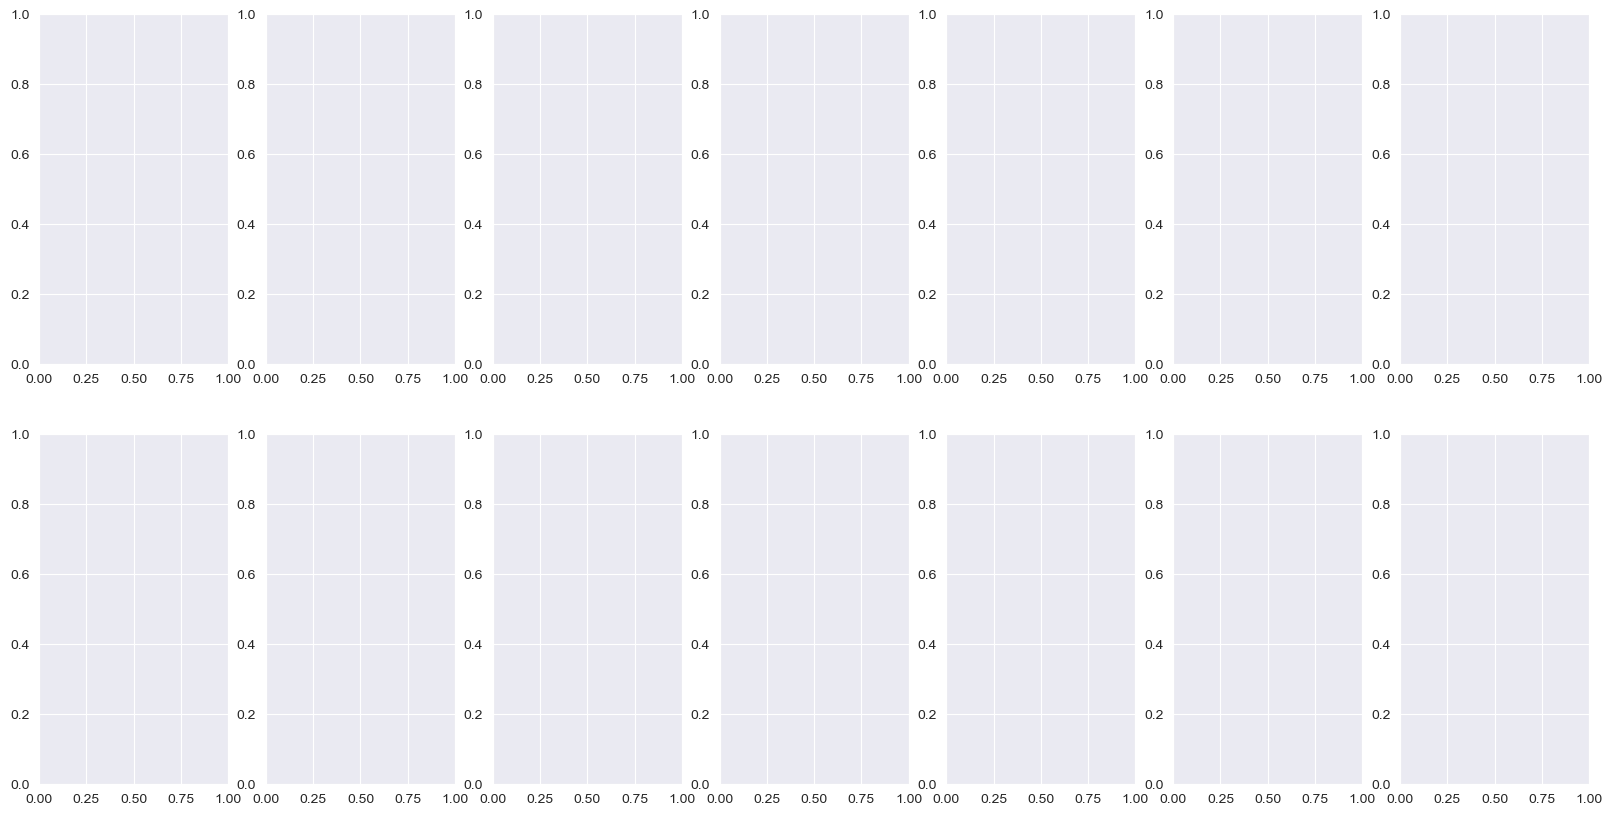

In [16]:
# create boxplot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data= df, ax = ax[index] )
    index +=1

In [ ]:
# create distplot
# create boxplot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax = ax[index] )
    index +=1

In [ ]:
# MinMax Normilization
cols = ['CRIM', 'ZN', 'TAX', 'B']
for col in cols:
# find minimum and maxium of that columns
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col] - minimum) / (maximum - minimum)

In [ ]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax = ax[index] )
    index +=1
    plt.tight_layout(pad= 0.5, w_pad=1, h_pad=5)

In [ ]:
#standerdization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_col = scaler.fit_transform(df[cols])
scaled_col = pd.DataFrame(scaled_col, columns= cols)
scaled_col.head()


In [ ]:
for col in cols:
    df[col] = scaled_col[col]

In [ ]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax = ax[index] )
    index +=1
    plt.tight_layout(pad= 0.5, w_pad=1, h_pad=5)

#### OverFittin & UnderFitting

#Coorelation Matrix

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot= True, cmap='coolwarm')

In [ ]:
sns.regplot(y=df['MEDV'], x= df['LSTAT'])

In [ ]:
sns.regplot(y=df['MEDV'], x= df['RM'])

#### Input Split

In [ ]:
X = df.drop(columns=['MEDV', 'RAD'], axis=1)
y = df['MEDV']

#### Train Test Split

In [ ]:
#Model Training

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
# train the model

def train(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)
    model.fit(x_train, y_train)
    # predict the model
    pred = model.predict(x_test)
    cv_score = cross_val_score(model,X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))

    print('Model Report')
    print('MSR:', mean_squared_error(y_test, pred))
    print('CV_score', cv_score)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
train(model,X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Predection')

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model,X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values()
coef.plot(kind='bar', title='Features Importance')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model,X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values()
coef.plot(kind='bar', title='Features Importance')

In [ ]:
from sklearn.tree import ExtraTreeRegressor
model = ExtraTreeRegressor()
train(model,X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values()
coef.plot(kind='bar', title='Features Importance')